<a href="https://colab.research.google.com/github/RekhaS02/ML-Mini-Project/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/mini project/data.csv')


In [ ]:
data.head()

,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,M,44,6.8,64,4.9,4.9,2.8,2.0,1.8,1.2,21.0,N
1,F,35,3.9,38,5.4,3.8,5.9,0.5,4.3,1.0,22.0,N
2,M,40,5.0,63,4.0,4.8,2.5,1.1,2.7,1.1,23.0,N
3,F,35,2.8,50,5.0,4.7,2.5,1.3,2.4,1.1,20.0,N
4,F,42,2.1,45,4.9,3.0,1.1,1.1,1.4,1.4,21.0,N


In [ ]:
X = data.iloc[:, :-1]


In [ ]:
y = data.iloc[:, -1]

In [ ]:
print(X)


    Gender  Age  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0        M   44   6.8  64    4.9   4.9  2.8  2.0  1.8   1.2  21.0
1        F   35   3.9  38    5.4   3.8  5.9  0.5  4.3   1.0  22.0
2        M   40   5.0  63    4.0   4.8  2.5  1.1  2.7   1.1  23.0
3        F   35   2.8  50    5.0   4.7  2.5  1.3  2.4   1.1  20.0
4        F   42   2.1  45    4.9   3.0  1.1  1.1  1.4   1.4  21.0
..     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...
995      F   52   4.7  34    9.9   5.1  4.5  0.6  2.7   2.0  26.0
996      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5
997      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0
998      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4
999      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2

[1000 rows x 11 columns]


In [ ]:
print(y)

0      N
1      N
2      N
3      N
4      N
      ..
995    Y
996    Y
997    Y
998    Y
999    Y
Name: Class, Length: 1000, dtype: object


## Data Encoding

In [ ]:
X_encoded = pd.get_dummies(X, columns=['Gender'])

In [ ]:
print(X_encoded)

     Age  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Gender_F  \
0     44   6.8  64    4.9   4.9  2.8  2.0  1.8   1.2  21.0     False   
1     35   3.9  38    5.4   3.8  5.9  0.5  4.3   1.0  22.0      True   
2     40   5.0  63    4.0   4.8  2.5  1.1  2.7   1.1  23.0     False   
3     35   2.8  50    5.0   4.7  2.5  1.3  2.4   1.1  20.0      True   
4     42   2.1  45    4.9   3.0  1.1  1.1  1.4   1.4  21.0      True   
..   ...   ...  ..    ...   ...  ...  ...  ...   ...   ...       ...   
995   52   4.7  34    9.9   5.1  4.5  0.6  2.7   2.0  26.0      True   
996   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5     False   
997   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0     False   
998   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4     False   
999   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2     False   

     Gender_M  Gender_f  
0        True     False  
1       False     False  
2        True     False  
3       False     False  
4    

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

## Standard Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
print(X_scaled)

[[-1.08336248  0.57103945 -0.08244551 ... -0.87566229  0.87744601
  -0.0316386 ]
 [-2.10668976 -0.4174742  -0.51610592 ...  1.14199276 -1.13967126
  -0.0316386 ]
 [-1.5381746  -0.04252074 -0.09912476 ... -0.87566229  0.87744601
  -0.0316386 ]
 ...
 [ 0.05366783 -0.04252074 -0.03240778 ... -0.87566229  0.87744601
  -0.0316386 ]
 [-2.67520491  0.67329948  0.20110167 ... -0.87566229  0.87744601
  -0.0316386 ]
 [-2.56150188 -0.72425429 -0.1491625  ... -0.87566229  0.87744601
  -0.0316386 ]]


## ANOVA F-Value Feature Selection

In [ ]:


# Feature selection using SelectKBest
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y_encoded)

from imblearn.over_sampling import SMOTE

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y_encoded)


In [ ]:
selected_features = selector.get_support()
feature_names = X_encoded.columns
selected_feature_names = feature_names[selected_features]

print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

print(X_selected)

Selected Features:
Age
HbA1c
Chol
TG
BMI
[[-1.08336248 -1.3349833   0.02857612  0.32159797 -1.72947219]
 [-2.10668976 -1.13756831 -0.81687114  2.53513226 -1.52785548]
 [-1.5381746  -1.69033027 -0.04828272  0.10738497 -1.32623876]
 ...
 [ 0.05366783 -0.54532336 -0.81687114 -0.46384968  0.68992836]
 [-2.67520491 -0.62428935 -0.58629461 -0.89227567 -0.43912523]
 [-2.56150188  1.58675847 -0.58629461 -0.10682802  1.53671855]]


## Training and Test Data Allocation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training and Prediction

## Hyperparameter Optimization

In [ ]:
param_grid = [
     {'activation': ['relu', 'tanh', 'logistic', 'identity'],
      'hidden_layer_sizes': [(100, 50, 25), (50, 25), (25)],
     'alpha': [0.1, 0.01, 0.001, 0.0001],
     'solver': ['lbfgs', 'sgd', 'adam'],
     'learning_rate': ['constant', 'adaptive', 'invscaling']
      }
]
optimal_params = GridSearchCV(
     MLPClassifier(max_iter=100),
     param_grid,
     cv = 5,
     scoring = 'accuracy',
     verbose = 0
)

In [ ]:
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

Streaming output truncated to the last 5000 lines.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/n

{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Training

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='tanh', alpha=0.1, solver='lbfgs', learning_rate='constant')
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 50, 25),
              solver='lbfgs')

## Prediction

In [ ]:
y_pred = mlp.predict(X_test)

# Results

## Decoding

In [ ]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

## Confusion Matrix

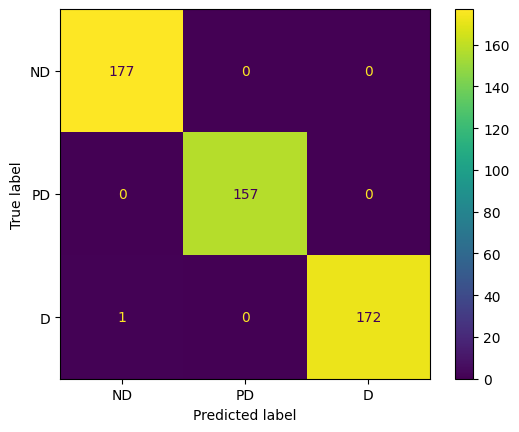

In [ ]:
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
cm_fig = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ND', 'PD', 'D'])
cm_fig.plot()
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test_decoded, y_pred_decoded))
# Assuming y_test_decoded and y_pred_decoded are your true and predicted labels respectively

# Precision, Recall, F1-score, Accuracy
precision = precision_score(y_test_decoded, y_pred_decoded, average='weighted')
recall = recall_score(y_test_decoded, y_pred_decoded, average='weighted')
f1 = f1_score(y_test_decoded, y_pred_decoded, average='weighted')
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)

# Display the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

              precision    recall  f1-score   support

           N       0.99      1.00      1.00       177
           P       1.00      1.00      1.00       157
           Y       1.00      0.99      1.00       173

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507

Precision: 0.9980
Recall: 0.9980
F1-Score: 0.9980
Accuracy: 0.9980
